In [1]:
# Compare CRM variables at single column between two simulations 
import cartopy.crs as ccrs
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pickle
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import sys
from IPython.display import HTML
sys.setrecursionlimit(9000)

In [2]:
# Set the location of the column
Center_lons = np.array([270., 275.0, 280.])
Center_lat = -15.0
nx=len(Center_lons)


In [3]:
# Model output paths
PATH = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z1600m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'
PATH2 = '/scratch1/07088/tg863871/Control_testDX_CRM_output_NOtwin_v3_SP_ERA5_2008_F-MMF1_rrtmgp_frontera_ne16pg2_r05_oQU240_CRM1_32x_120z200m.1s_crm_nx_rad_16_np_2048_nlev_125.frontera/run/'

files = xr.open_mfdataset(PATH+"/*.cam.h0.2008-10-01-[01]*.nc")
files2 = xr.open_mfdataset(PATH2+"/*.cam.h0.2008-10-01-[01]*.nc")
lon = files.lon.isel(time=0).values
lat = files.lat.isel(time=0).values

In [4]:
# Function calculate thedistance between two points
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p) * (1-cos((lon2-lon1)*p)) / 2
    return 12742 * asin(sqrt(a))

In [5]:
# Find the column index corresponds to the minimum distance
ncols = np.empty(shape=nx)
for ix in range(nx-1):
    ddmin = 99999999.0
    for il in range(4166):
        dd = distance(lat[il], lon[il], Center_lat, Center_lons[ix])
        if dd<ddmin:
            ddmin = dd
            minindex = il
    ncols[ix] = int(minindex)

ncols = ncols.astype(int)

In [39]:
def animate_2D():
#         print(icol)
#        print (type(icol))
    fig, ax = plt.subplots(2,nx,figsize=(10,10))
#        fig, ax = plt.subplots(figsize=(20, 10))
    def animate(i):
        for ix in range(nx-1):
            icol = ncols[ix]
            I = files.CRM_T.isel(ncol=icol).isel(time=i).plot(ax=ax[0,ix], add_colorbar=False)
          #  return (I,)
        plt.close()   # Not necessary but will avoid a stray figure popping up
    return animation.FuncAnimation(fig, animate, frames=files.time.size, interval=150, blit=True)

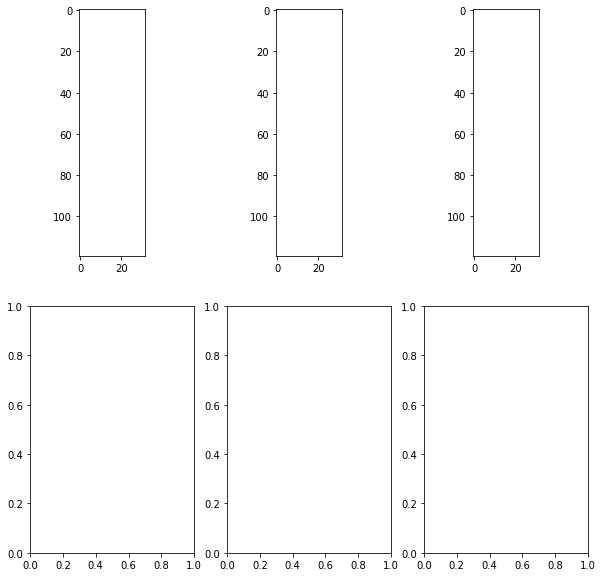

In [51]:
fig, ax = plt.subplots(2,nx,figsize=(10,10))
figs = []
for it in range(files.time.size-1):
   # for ix in range(nx-1):
    #    icol = ncols[ix]
    I0 = np.squeeze(files.CRM_T.isel(ncol=ncols[0]).isel(time=it).values)
    I1 = np.squeeze(files.CRM_T.isel(ncol=ncols[1]).isel(time=it).values)
    I2 = np.squeeze(files.CRM_T.isel(ncol=ncols[2]).isel(time=it).values)
    cs0 = ax[0,0].imshow(I0)
    cs1 = ax[0,1].imshow(I1)
    cs2 = ax[0,2].imshow(I2)
    figs.append([cs0,cs1,cs2])

#animation.FuncAnimation(fig, figs, frames=files.time.size, interval=150, blit=True)
ani = animation.ArtistAnimation(fig, figs, interval=150, blit=False, repeat=True)
ani.save("testy.mp4")




In [53]:
from IPython.display import Video
Video("./testy.mp4")

3


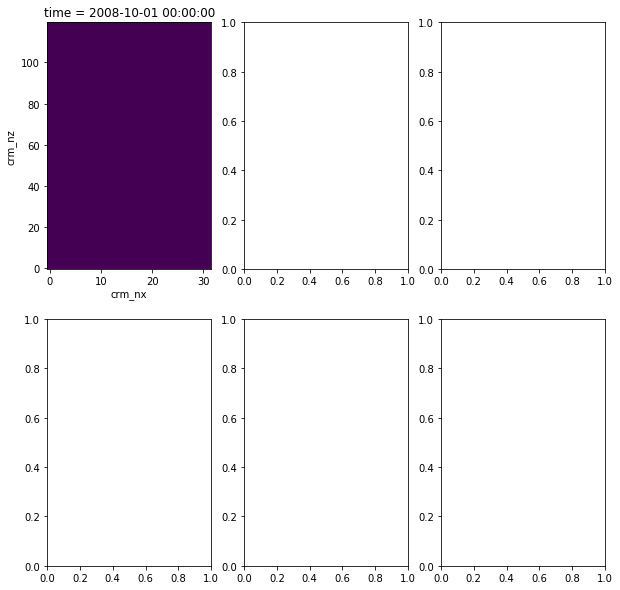

In [38]:
anim = animate_2D()
animation.writers.list()




#plt.rcParams['animation.writer'] = 'ffmpeg'
print(nx)

In [33]:
HTML(anim.to_html5_video())

AttributeError: 'NoneType' object has no attribute 'to_html5_video'

In [10]:
# Find the CRM data at the selected column
colnum = minindex
Z3p = Z3[0,:,colnum]
CRMTp  = CRMT[0,:,0,:,colnum]
CRMTp2 = CRMT2[0,:,0,:,colnum]
CRMUp  = CRMU[0,:,0,:,colnum]
CRMUp2 = CRMU2[0,:,0,:,colnum]
CRMWp  = CRMW[0,:,0,:,colnum]
CRMWp2 = CRMW2[0,:,0,:,colnum]
CRMTKp  = CRMTK[0,:,0,:,colnum]
CRMTKp2 = CRMTK2[0,:,0,:,colnum]
CRMTKHp  = CRMTKH[0,:,0,:,colnum]
CRMTKHp2 = CRMTKH2[0,:,0,:,colnum]
CRMQCp  = CRMQC[0,:,0,:,colnum]
CRMQCp2 = CRMQC2[0,:,0,:,colnum]
x      = list(range(0,32))
# Will change this part in the next model simulation
# This is done because crm_nz=120
Z3p = Z3p[::-1]
Z3p = Z3p[0:120]

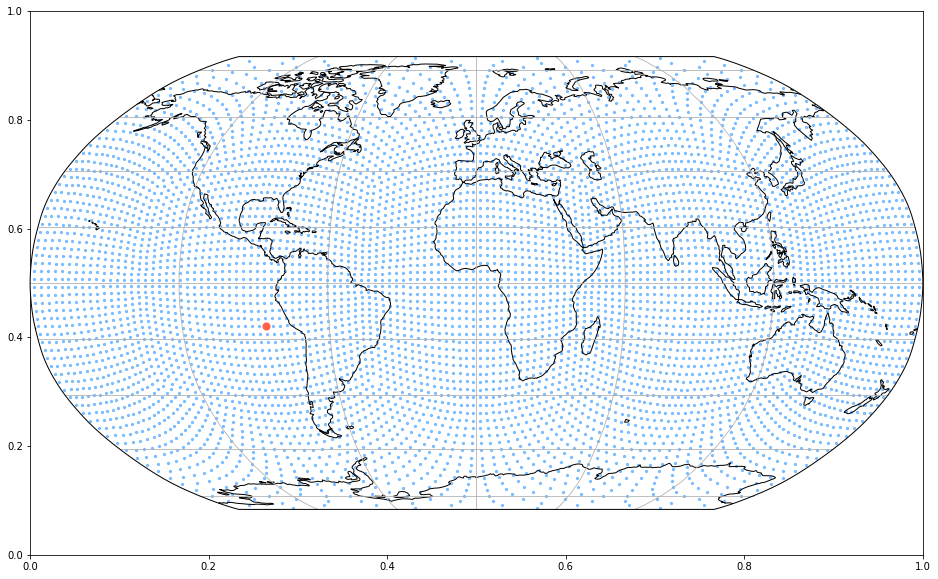

In [11]:
# Check the location of the selected column
#-- create figure and axes object
fig, ax = plt.subplots(figsize=(16,10))

#-- choose map projection
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
#-- add coastlines, country border lines, and grid lines
ax.coastlines()
ax.gridlines()
plt.scatter(lon[1:6144], lat[1:6144],
            color="dodgerblue",
            s=5,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important
plt.scatter(lon[colnum], lat[colnum],
            color="tomato",
            s=50,
            alpha=1,
            transform=ccrs.PlateCarree()) ## Important
#plt.show()


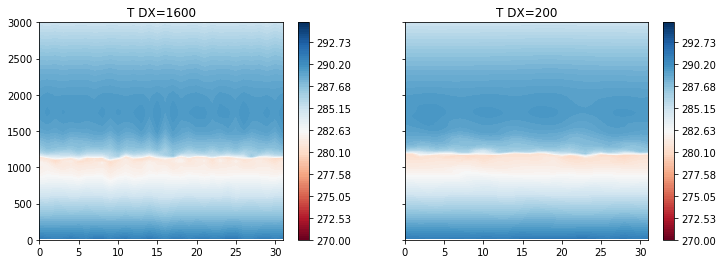

In [12]:
# Plot the CRM_T
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(270, 295, 100)
cs = ax1.contourf(x,Z3p,  CRMTp,levels=levels,cmap = 'RdBu')
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('T DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTp2,levels=levels,cmap = 'RdBu')
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('T DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

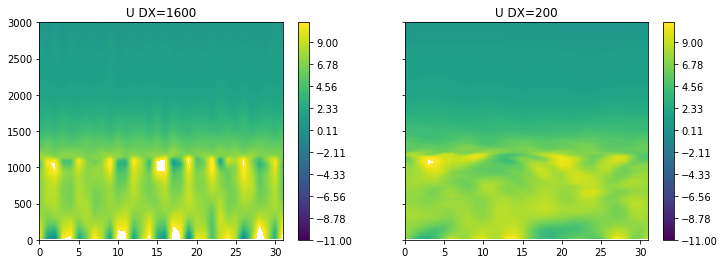

In [13]:
# Plot the CRM_U
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(-11, 11, 100)
cs = ax1.contourf(x,Z3p,  CRMUp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('U DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMUp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('U DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

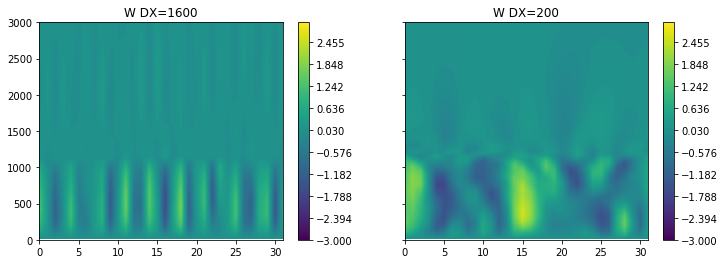

In [14]:
# Plot the CRM_W
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(-3, 3, 100)
cs = ax1.contourf(x,Z3p,  CRMWp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('W DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMWp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('W DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

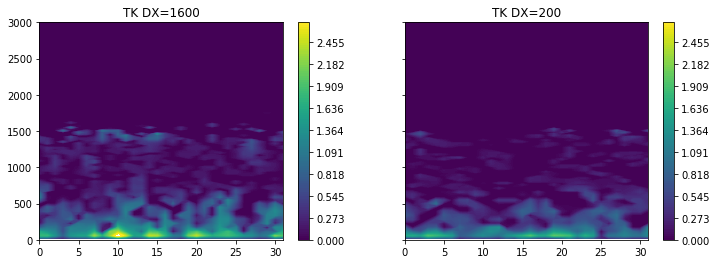

In [13]:
# Plot the CRM_TK
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 2.70, 100)
cs = ax1.contourf(x,Z3p,  CRMTKp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('TK DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTKp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('TK DX=200')
ax2.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

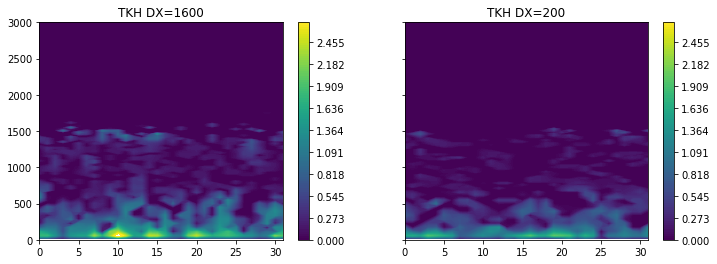

In [14]:
# Plot the CRM_TKH
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 2.70, 100)
cs = ax1.contourf(x,Z3p,  CRMTKHp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('TKH DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMTKHp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('TKH DX=200')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()

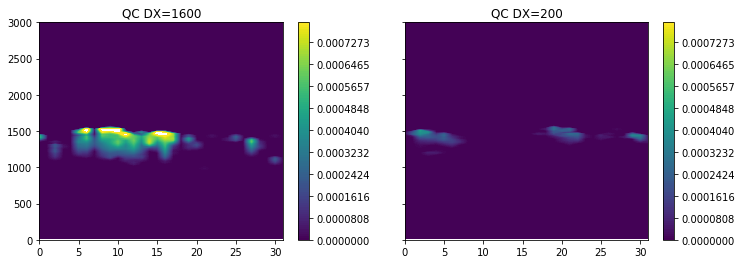

In [15]:
# Plot the CRM_QC
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), sharey=True)
levels = np.linspace(0, 0.00080, 100)
cs = ax1.contourf(x,Z3p,  CRMQCp,levels=levels)
cbar = fig.colorbar(cs, ax=ax1)
ax1.set_title('QC DX=1600')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
cs2 = ax2.contourf(x,Z3p,  CRMQCp2,levels=levels)
cbar2 = fig.colorbar(cs2, ax=ax2)
ax2.set_title('QC DX=200')
ax1.set(xlim=(0, 31), ylim=(0, 3000))
plt.subplots_adjust(hspace=2.5)
plt.show()